<h1 style="color:red;text-align: center";> ISAT 341 Machine Learning & Data Science</h1>


<h2 style='color:red;text-align:center';> Lab 7 Implementing a Perceptron Learning Algorithm in Python
    

<br>
<img src="images/machine_learning.jpg" width=200; height=200>
<h4 style='color:red;text-align:center'> Created by Quron Anthony

## <u> Objectives

Objectives
- Reuse and modify code from Activity 10 (Pre-Lab 7).
- Reuse code from other lab(s)
- Understand the McCulloch and Pitts (MCP) simplified model of a neuron
- Mathematically Implement Frank Rosenblatt’s perceptron learning rule based on
the MCP neuron model (use some Linear Algebra)
- Use the Python Programming Language to Implement Frank Rosenblatt’s
perceptron learning rule based on the MCP neuron model.
- Use NumPy matrix products and other Numpy features (arrays and methods)
- Train the MCP model for binary classification on subset of Iris flower dataset

In [20]:
import numpy as np 

class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        self.w_ = np.zeros(1+ X.shape[1])
        #Below sets each weight to a specific values. 
        self.w_[0]=0.5
        self.w_[1]=0.5
        self.w_[2]=0.5
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update 
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
      
    
    def net_input(self,X):
        
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Importing Iris Dataset 

In [14]:
import pandas as pd

df= pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
import pandas
url = 'https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data'
names= ['sepal_length','sepal_width','petal_length','petal_width','class']
iris_df = pandas.read_csv(url,names=names)
print(iris_df.shape)
iris_df.tail()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
# Converts Versicolor = 1 and setosa = -1
import numpy as np

y=df.iloc[0:100, 4].values

#Selecting Setosa and versicolor
y = np.where(y=='Iris-setosa',-1,1)
# Extract sepal length and petal length 
X = df.iloc[0:100,[0,2]].values
X.shape[1]

2

### Plotting Decision Boundary 

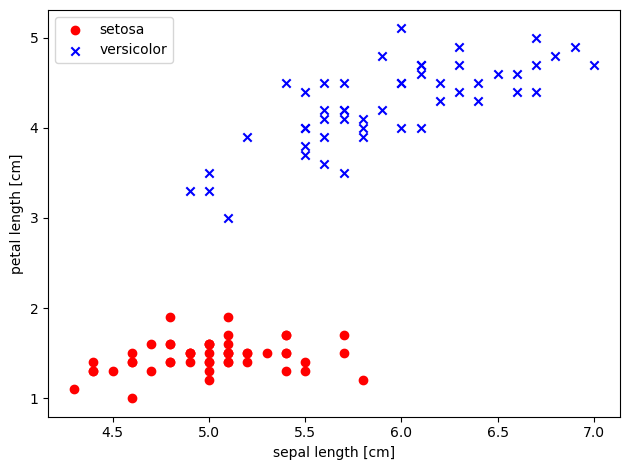

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[:50,0],X[:50,1],
           color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('iris_decision_boundary.png',dpi=300)
plt.show()


### Training the Perceptron Model 

In [18]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

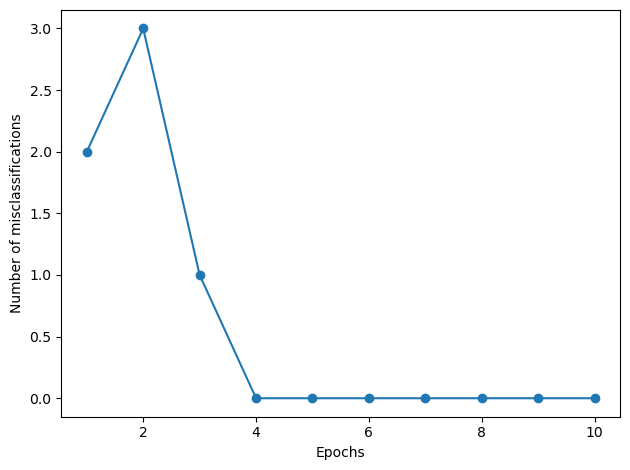

In [19]:
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.savefig('perceptron_1.png',dpi=300)
plt.show()

|Run #|𝜼|Epochs to Convergence|𝒘𝟎|𝒘𝟏|𝒘𝟐|
|-----|-|---------------------|--|--|--|
|1    |0.05|     6       |0|0|0|
|2    |0.1|        6           |0.5|0.5|0.5|
|3    |0.05|      6            |2|-2|3|
|4    |0.05|       6           |-4|4|1|
|5    |0.1|    6|1|1|1| 

### Questions 

1. self.w_[1:] += update * xi
    This code is updating the weight by multiplying the updated xi by the update equation listed above 
    
2. errors += int(update != 0.0)
    This code is adding to the errors list as in integer that cannot equal 0. 